# Toronto City Rainfall Forecast

In [1]:
## Loading the csv file containing monthly precipitation from January 1939 to April 2022
Toronto_Precipitation <- read.csv("Toronto_Precipitation.csv")

In [2]:
head(Toronto_Precipitation)

,date,precipitation
,<chr>,<dbl>
1,2022-04-01,77.29
2,2022-03-01,47.42
3,2022-02-01,50.09
4,2022-01-01,59.28
5,2021-12-01,56.53
6,2021-11-01,65.86


In [4]:
tail(Toronto_Precipitation)

,date,precipitation
,<chr>,<dbl>
995,1939-06-01,42.1
996,1939-05-01,72.3
997,1939-04-01,33.3
998,1939-03-01,41.7
999,1939-02-01,76.6
1000,1939-01-01,40.4


In [5]:
## The data is in descending chronological order, so we need to reverse it to use as conventional time series data
Toronto_Precipitation$date <- rev(Toronto_Precipitation$date)
Toronto_Precipitation$precipitation <- rev(Toronto_Precipitation$precipitation)

In [6]:
head(Toronto_Precipitation)

,date,precipitation
,<chr>,<dbl>
1,1939-01-01,40.4
2,1939-02-01,76.6
3,1939-03-01,41.7
4,1939-04-01,33.3
5,1939-05-01,72.3
6,1939-06-01,42.1


In [7]:
tail(Toronto_Precipitation)

,date,precipitation
,<chr>,<dbl>
995,2021-11-01,65.86
996,2021-12-01,56.53
997,2022-01-01,59.28
998,2022-02-01,50.09
999,2022-03-01,47.42
1000,2022-04-01,77.29


In [8]:
## Converting the data into time series
precipitation <- ts(Toronto_Precipitation[2],start=c(1939,1),frequency = 12)

In [9]:
head(precipitation)

precipitation
40.4
76.6
41.7
33.3
72.3
42.1


In [10]:
prec_1939_to_2015 <- ts(subset(Toronto_Precipitation, date <= '2015-12-31' ),start=c(1939,1),frequency = 12)

In [13]:
head(prec_1939_to_2015)

date,precipitation
1,40.4
2,76.6
3,41.7
4,33.3
5,72.3
6,42.1


In [14]:
## We only need the second row
prec_1939_to_2015 <- prec_1939_to_2015[,2]

## ARIMA Model

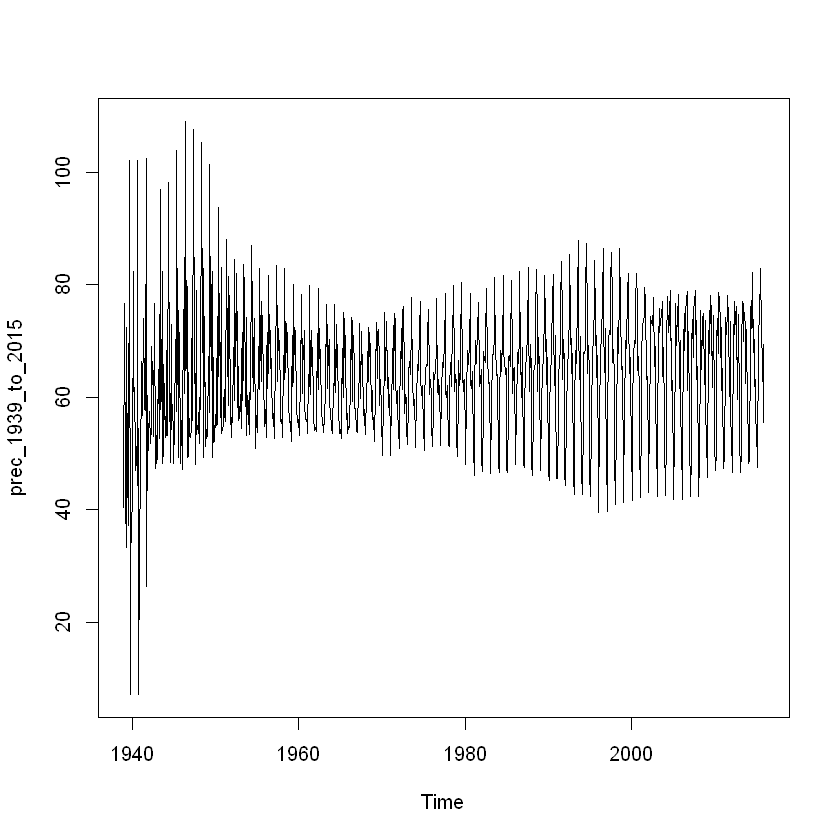

In [16]:
plot(prec_1939_to_2015)

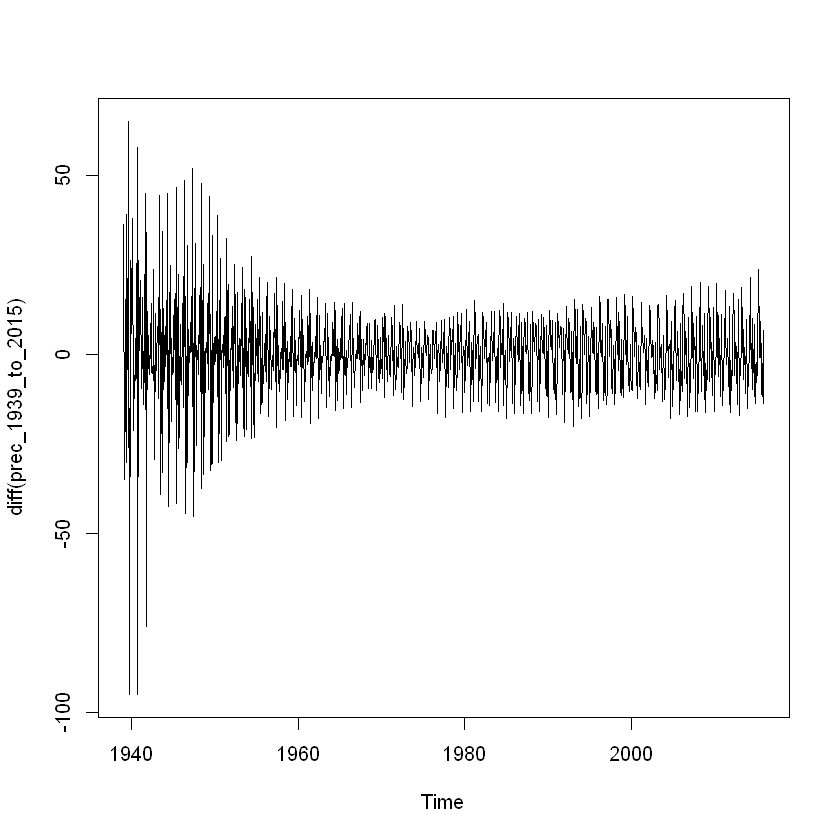

In [17]:
## We need the data to be centred about zero
plot(diff(prec_1939_to_2015))

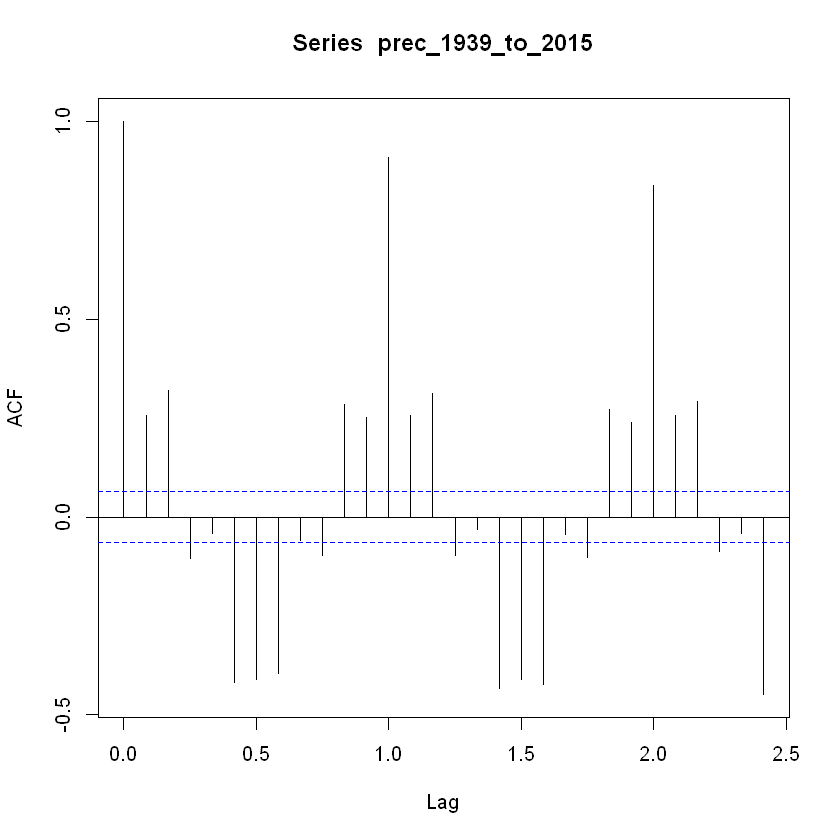

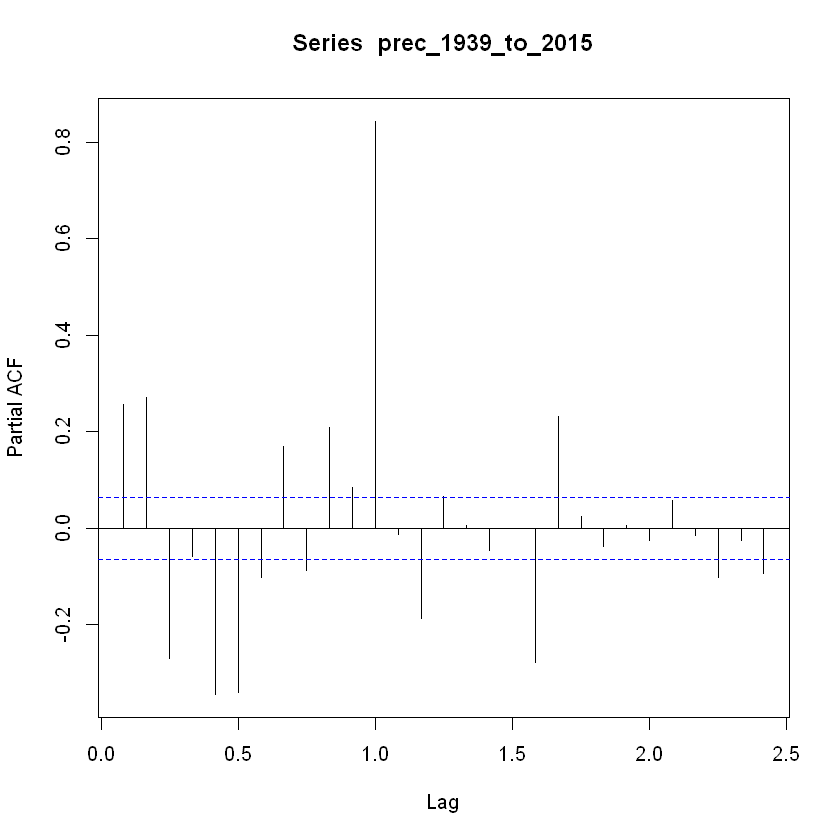

In [18]:
## In the ARIMA model, we obtain the q value the acf function and p value by the pacf function
## d value is 1 as we only need to use the difference function once to centre the data around zero
acf(prec_1939_to_2015)
pacf(prec_1939_to_2015)

In [19]:
## p = 1 and q = 2
fit <- arima(prec_1939_to_2015,c(1,1,2),seasonal=list(order=c(1,1,2),period=12))

In [21]:
## Creating the forecasted values from 2016 to 2021 using the predict function
prediction <- predict(fit, n.ahead= 12*6)

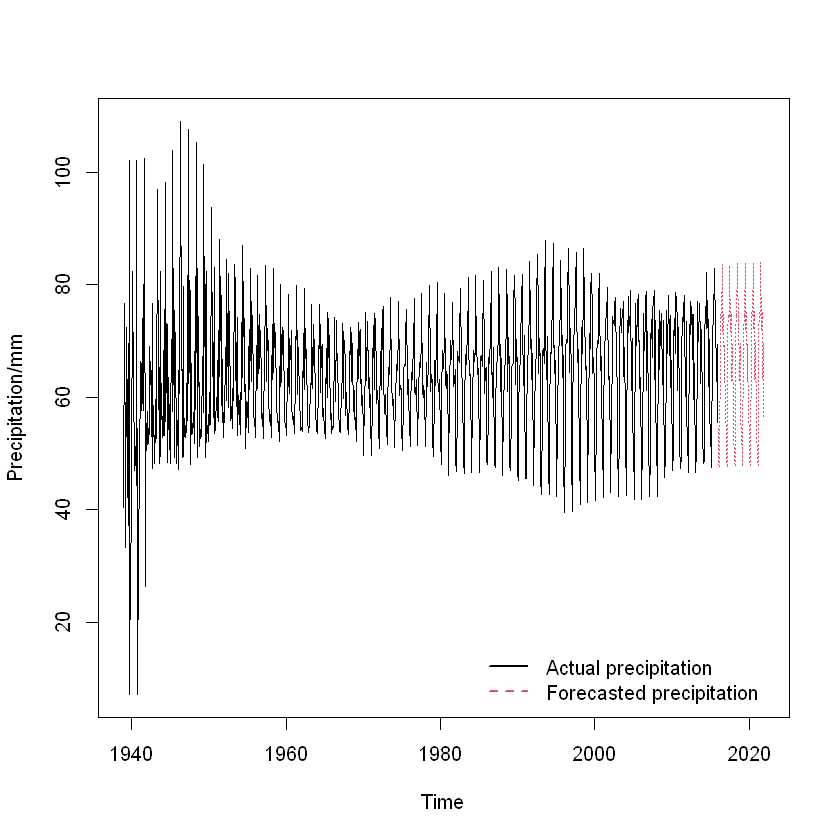

In [29]:
ts.plot(prec_1939_to_2015,prediction$pred,lty=c(1,3),col=c(1,2),ylab='Precipitation/mm')
legend('bottomright',bty="n",c("Actual precipitation","Forecasted precipitation"),lwd=2,col=c(1,2),lty=c(1,2))

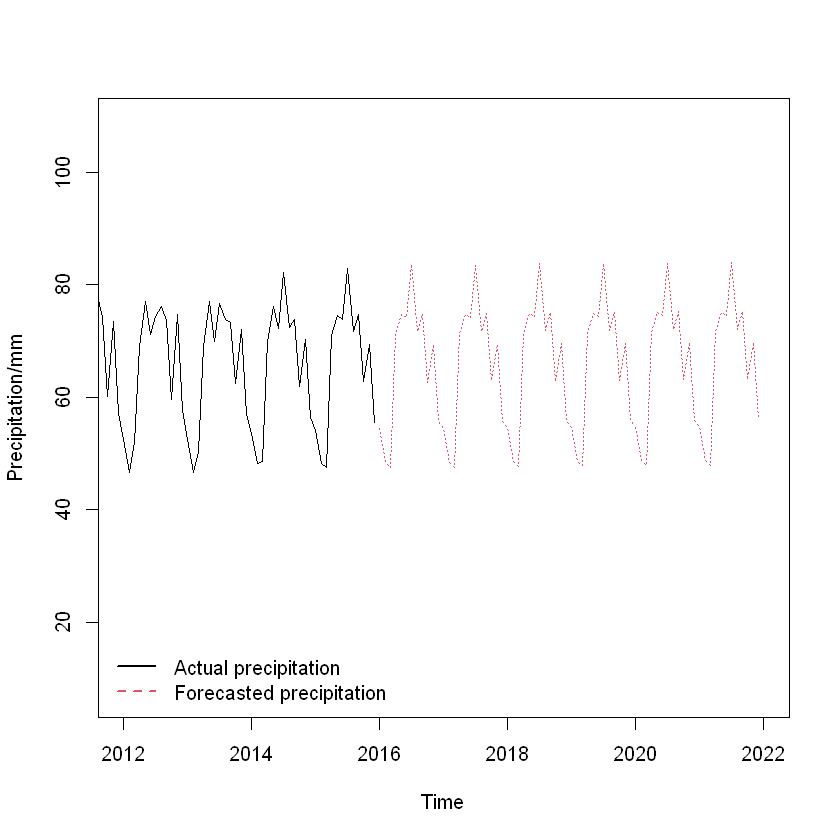

In [28]:
## Getting a closer view
ts.plot(prec_1939_to_2015,prediction$pred,lty=c(1,3),col=c(1,2),ylab='Precipitation/mm',xlim=c(2012,2022))
legend('bottomleft',bty="n",c("Actual precipitation","Forecasted precipitation"),lwd=2,col=c(1,2),lty=c(1,2))

## Checking accuracy using ARIMA model

In [30]:
## Extracting data from 2016 to 2021
prec_2016_to_2021 <- ts(subset(Toronto_Precipitation,date >= '2016-01-01' & date <= '2021-12-31'),start=c(2016,1),
                        frequency = 12)
head(prec_2016_to_2021)

date,precipitation
1,52.64
2,46.39
3,45.33
4,72.52
5,74.16
6,77.85


In [31]:
## We only need the second column for analysis
prec_2016_to_2021 <- prec_2016_to_2021[,2]

In [32]:
error_arima <- abs(prediction$pred - prec_2016_to_2021)

In [33]:
error_percentage_arima <- 100*(error_arima/prec_2016_to_2021)

In [34]:
accuracy_arima <- 100 - mean(error_percentage_arima)

In [35]:
accuracy_arima

[1] 95.50758

In [36]:
## Our forecast using the ARIMA model is 95.5% accurate

## Holt-Winters Model

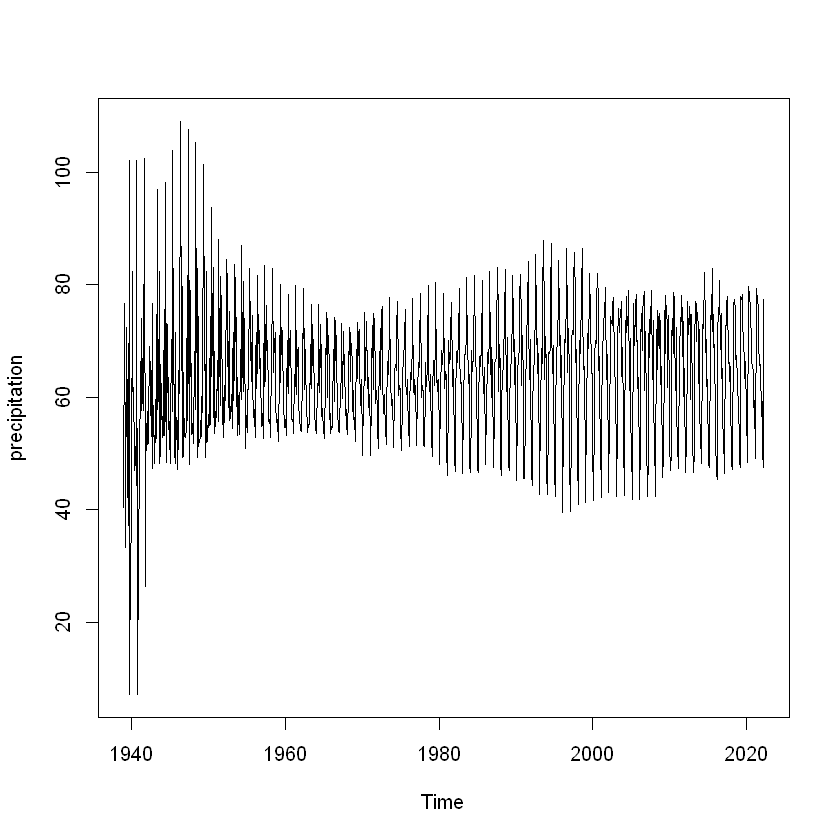

In [37]:
plot(precipitation)

In [38]:
## Peak sizes are roughly equal over time so it is an additive time series model
model_holtwinters <- HoltWinters(prec_1939_to_2015,seasonal = 'additive')

In [39]:
## Creating the forecasted values from 2016 to 2021 using the predict function
future_holtwinters <- predict(model_holtwinters,n.ahead = 12*6)

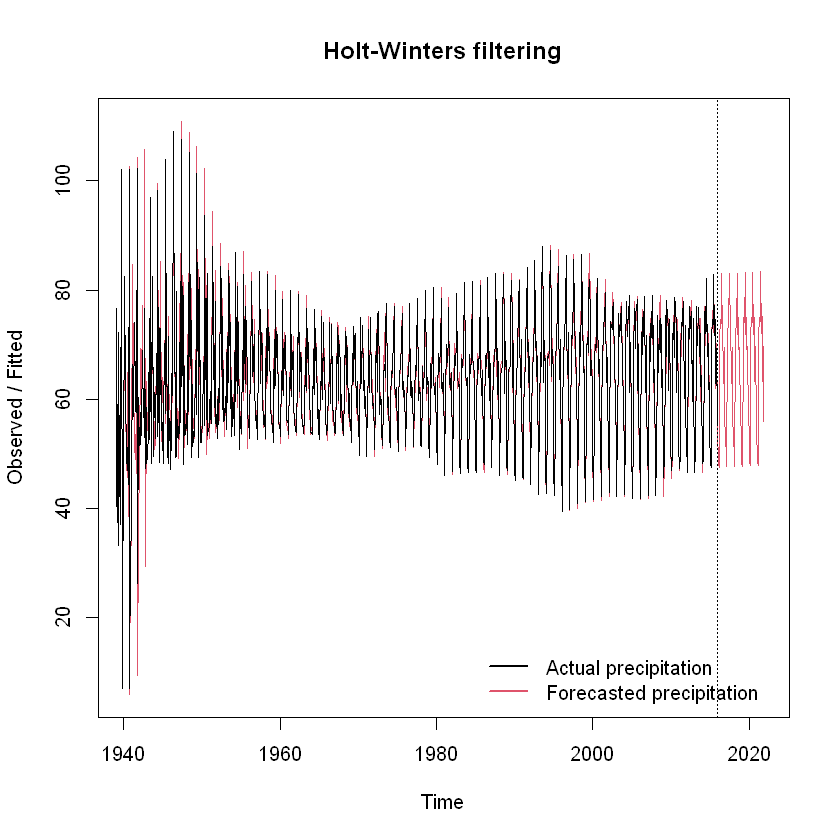

In [43]:
plot(model_holtwinters,future_holtwinters)
legend('bottomright',bty="n",c("Actual precipitation","Forecasted precipitation"),lwd=2,col=c(1,2))

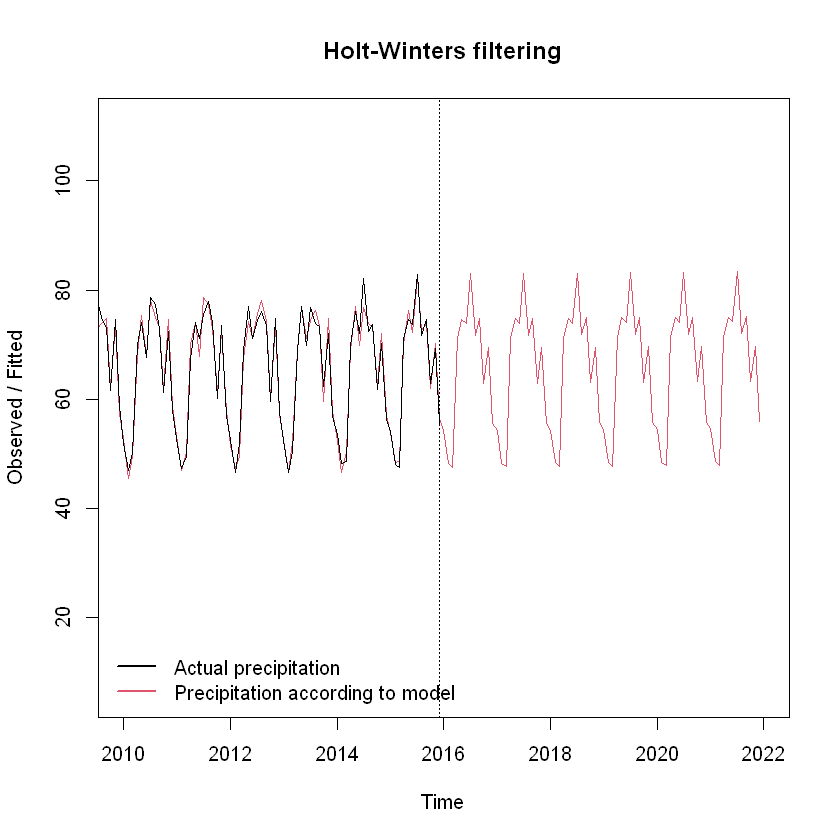

In [45]:
## Getting a closer view
plot(model_holtwinters,future_holtwinters,xlim=c(2010,2022))
legend('bottomleft',bty="n",c("Actual precipitation","Precipitation according to model"),lwd=2,col=c(1,2))

## Checking accuracy of the Holt-Winters model

In [46]:
future_holtwinters <- predict(model_holtwinters,n.ahead = 12*6)

In [47]:
head(future_holtwinters)

fit
54.21332
48.19764
47.55729
71.06825
74.68278
73.81548


In [48]:
future_holtwinters <- future_holtwinters[,1]

In [49]:
## From above, prec_2016_to_2021 is the actual monthly precipitation from 2016 to 2021
error_holtwinters <- abs(future_holtwinters - prec_2016_to_2021)

In [50]:
error_percentage_holtwinters <- 100*(error_holtwinters/prec_2016_to_2021)

In [51]:
accuracy_holtwinters <- 100 - mean(error_holtwinters)

In [52]:
accuracy_holtwinters

[1] 96.93907

In [53]:
## Our forecast using the Holt-Winters model is 96.9% accurate